This is an attempt at training R to be able to create functions that behaves under the rules of Tropical or MaxPlus Algebra! Here's the link to one of the resources to be used: https://www.math.uni-tuebingen.de/user/jora/downloads/FirstExpedition.pdf

# Tropical Algebra

## Basic Operations

We start by defining the tropical numbers. Let $ \mathbb{T}=\{-\infty\}\bigcup \mathbb{R} $. We denote the operations in this tropical semifield by uses of quotes or by using oplus $ \oplus $ and otimes $\odot$.

Tropical Addition: $"x+y"=x\oplus y:= max(x,y)$

Tropical Multiplication: $"x\cdot y= x \odot y := x+y$

In regards to our definition of the tropical numbers above, we note that $max(-\infty,y) = y, -\infty +y = -\infty$. This allows us to have neutral elements $-\infty=0_{\mathbb{T}}$ for $+_{\mathbb{R}}$ and $0=1_{\mathbb{T}}$ for $\times_\mathbb{R}$.

In [ ]:
`%oplus%` <- function(x,y) { max(x,y) }
`%otimes%` <- function(x,y) { x+y }

In [ ]:
max(22,10)
22 %oplus% 10
q <- 22 + 10
q
22 %otimes% 10

[1] 22

[1] 22

[1] 32

[1] 32

## Some Properties

The distributive properties hold: $ "x(y+z)"="xy+xz"$.

Mentioned before, it has additive and multiplicative identities.

Notice that $x \in \mathbb{T}$ \ $ \{-\infty\} = \mathbb{R}$ has an inverse with respect to $" \cdot"$. So this set under this tropical multiplication forms a group.

However, there is no tropical additive inverse! Idempotency exists for this group: $ x \oplus x = x$. But we can still work with this and we should.

In [ ]:
11 %oplus% 3 %oplus% 16

[1] 16

In [ ]:
15 %oplus% 11 %otimes% 10

[1] 25

In [ ]:
22 %otimes% (13 %oplus% 19)

[1] 41

In [ ]:
(22 %otimes% 13) %oplus% (22 %otimes% 19)

[1] 41

The statments (listed as exercises) should be more or less obvious using the rules that were listed previously (prove if you like):

$x \oplus_t y = log_t(t^x + t^y)$

$x \odot_t y = log_t (t^x + t^y)$

Here, this helps demonstrate that tropical arithmetic can be understood as a limit of classical arithmetic under logarithm, which is called Maslov dequantization.

# Tropical Polynomials

### One Variable


We can compare classical polynomials to tropical polynomials. First, we note exponentiation. Observe the following:

$x^{\odot 2} = x\odot x = x+x = 2x$

This would work similarly for any power greater than 1 as shown below (tho we would have to explicitly write this out for now):

In [ ]:
5 %otimes% 5 %otimes% 5

[1] 15

Classical Algebra:

$\sum_{i=0}^n a_ix^i = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n$

Tropical Algebra:

$"\sum_{i=0}^n a_ix^i = a_0 \oplus a_1 \odot x \oplus a_2 \odot x^{\odot 2} \oplus ... \oplus a_n x^{\odot n}$

$= a_0 \oplus a_1 \odot x \oplus a_2 \odot 2x \oplus ... \oplus a_n nx$

$=max(a_0, a_i+ix)$

Definition: A **convex, piecewise linear function** $f: \mathbb{T} \rightarrow \mathbb{T}$ is one such function that is convex. Convexity here means take two distinct points and draw a segment through it such that the line segment is above the graph between these points. Of course, piecewise linear is the standard piecewise function composed of linear equations.

Examples: Consider $f(x)="0 + x + (-2)x^2" = \max(0,x,-2+2x)$. What does this graph look like? Consider that since $x\in \mathbb{R}$, $0$ will dominate until $x>0$. Further, $-2+2x$ will eventually dominate this because of its slope.

In [ ]:
#plotting libraries
install.packages("ggplot2",version="3.4.2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



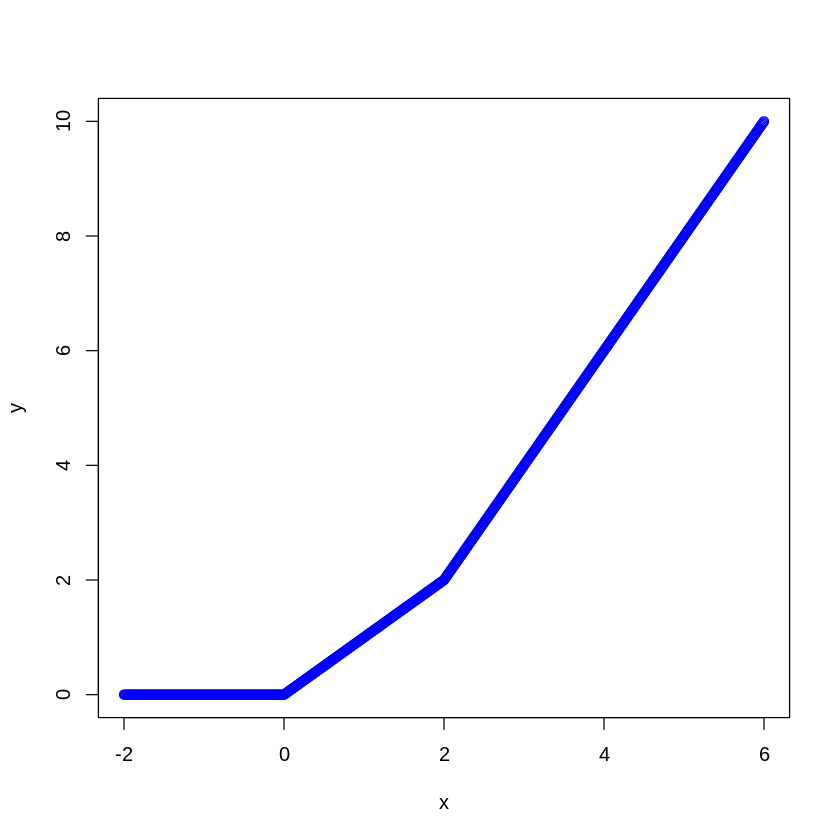

In [ ]:
x<-seq(-2,6,.01)
y<-pmax(0,x,-2+2*x)
plot(x,y,col="blue")

Getting some practice in, let's plot the following polynomials:

$P(x)="1-3x+2x^2"=\max(1,-3x,2x+2)$

$Q(x)="2-5x+10x^2-x^3"=\max(2,x-5,2x+10,3x-1)$

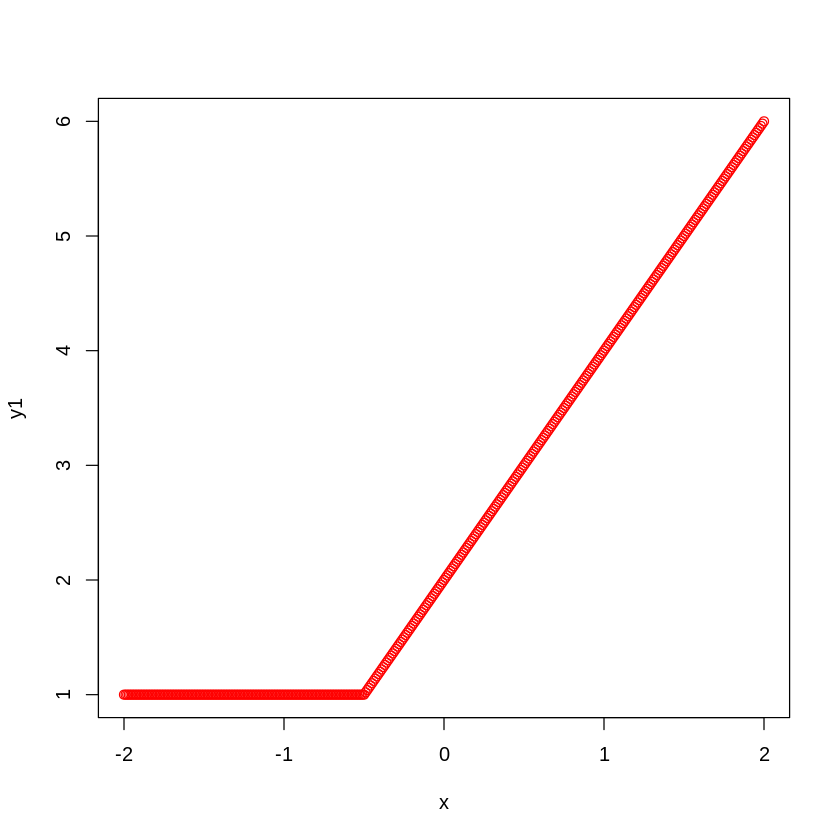

In [ ]:
x<-seq(-2,2,.01)
y1<-pmax(1,x-3,2*x+2)
plot(x,y1,col="red")

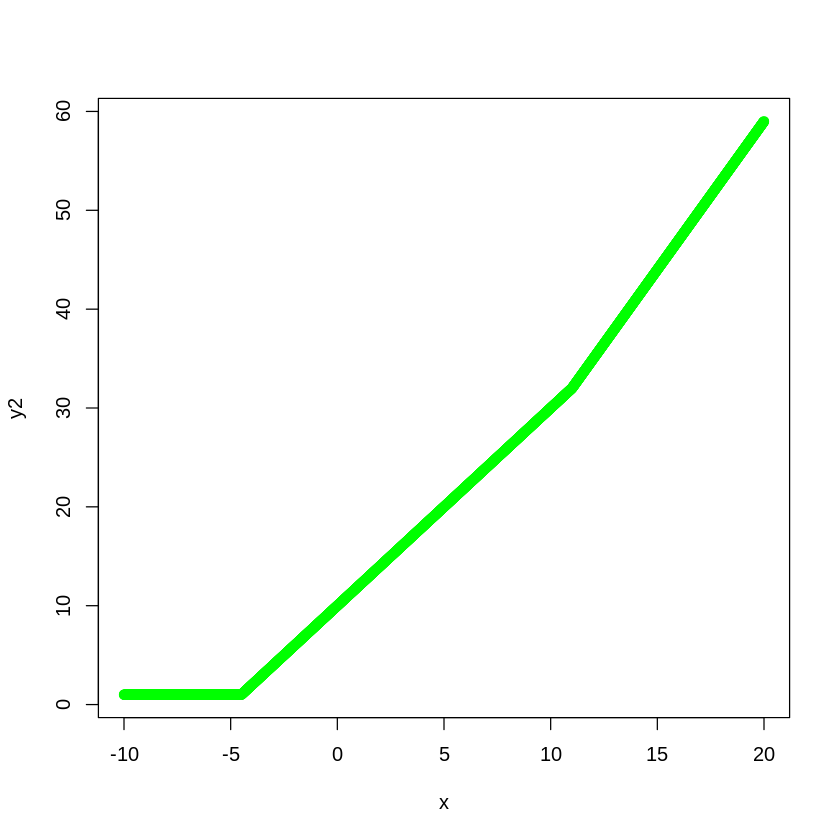

In [ ]:
x<-seq(-10,20,.01)
y2<-pmax(1,x-5,2*x+10,3*x-1)
plot(x,y2,col="green")

Stop Time: P. 6/50

### Multivariate

We may wish to look at polynomials of more than one variables. After all, curves of interest in algebraic geometry itself will also contain variations of one variable.

$f(x_1, x_2)= "\sum_{i,j\in S} a_{ij} x_1^i x_2^j" = \max_{(i,j)\in S}(a_{ij} +ix+jx)$

$S\subset \mathbb{N}^2$ or $S \subset \mathbb{Z}^2$

Set $a_{ij}=-\infty$ if $(i,j)\notin S$.

To write this in "vector notation" for some reason, we first note that $I\in \mathbb{Z}^2$. Then:

$"x^I" = \langle I, x \rangle$. Giving a definition, we can rewrite our polynomial equation as:

$f(x)="\sum_{I\in S} a_Ix^I" = \max_{I\in S} (a_I + \langle I, x \rangle)$

Trying some examples from the book, we can take a look at contour plots of these types of polynomials before going forward:

$f(x,y)="0+x+y"=\max(0,x,y)$

$f(x,y)="0+x+y+(-1)x^2+1xy+(-1)y^2"=\max(0,x,y,2x+1,x+y+1,2y+1)$

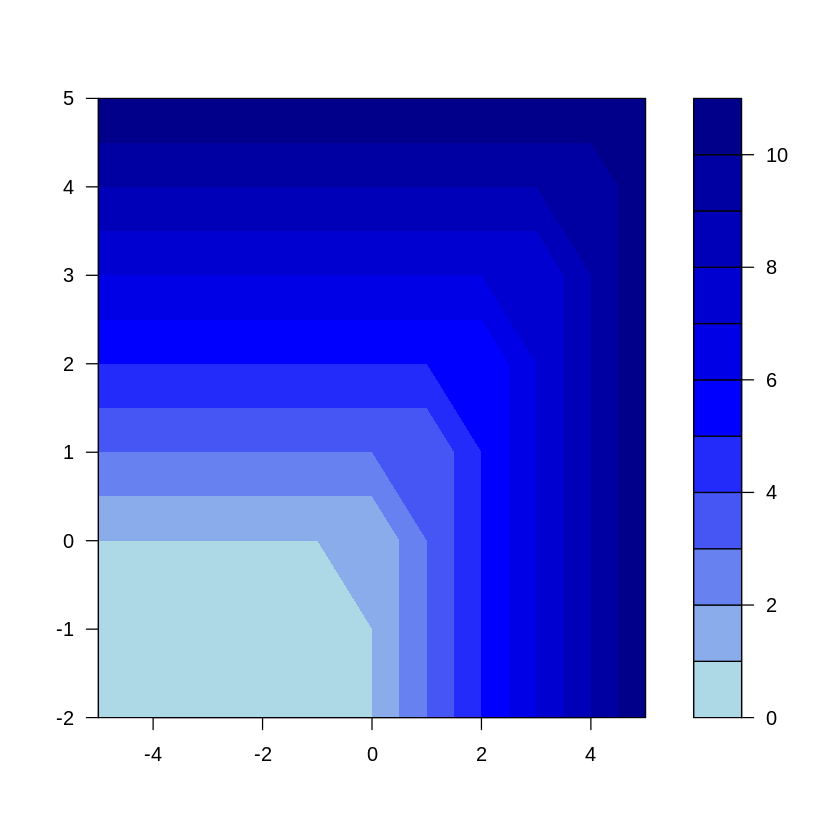

In [ ]:
x<-seq(-5,5,1)
y3<-seq(-2,5,1)
z1<- outer(x,y3,function(x,y3) pmax(0,x,y3,2*x+1,x+y3+1,2*y3+1))
blue_palette<- colorRampPalette(c("lightblue","blue","darkblue"))
filled.contour(x,y3,z1,nlevels=10, color.palette=blue_palette)

Trying $f(x,y)="0+x+y+xy"$

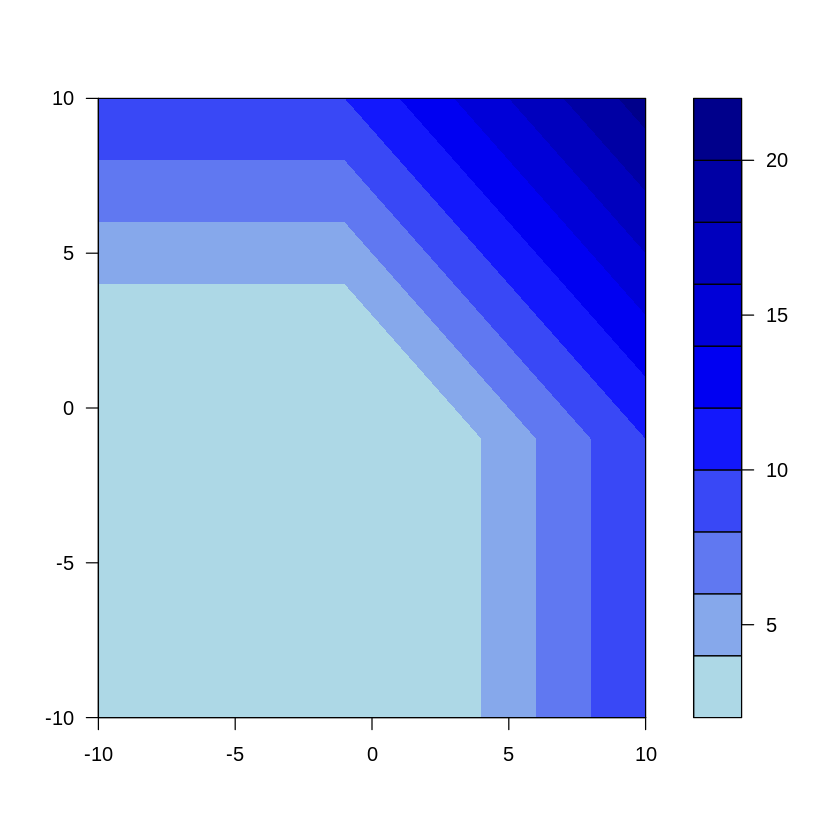

In [ ]:
x<-seq(-10,10,.01)
y3<-seq(-10,10,.01)
z1<- outer(x,y3,function(x,y3) pmax(0,x,y3,2*+1,x+y3+1))
blue_palette<- colorRampPalette(c("lightblue","blue","darkblue"))
filled.contour(x,y3,z1,nlevels=10, color.palette=blue_palette)